# PDBbind affinity distribution
This notebook analyses the distributions of the three binding affinity metrics in the PDBbind general set.

* Kd (dissociation constant)
* Ki (association constan)
* IC50 (half-maximal inhibitory concentration)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# 1. Configuration

In [2]:
INDEX_PATH = '../data/pdbbind/INDEX_general_PL_data.2019'

# 2. Parse ressults

In [3]:
contents = []
with open(INDEX_PATH, 'r') as f:
    for line in f.readlines():
        if line[0] != "#":
            splitted_elements = line.split()
            if len(splitted_elements) == 8:
                # Ignore "//"
                contents.append(
                    splitted_elements[:5] + splitted_elements[6:])
            else:
                continue

# -logKd/Ki is the y label
affinity_df = pd.DataFrame(contents, columns=(
    'PDB_code', 'resolution', 'release_year',
    '-logKd/Ki', 'Kd/Ki', 'reference', 'ligand_name'))

affinity_df['-logKd/Ki'] = pd.to_numeric(affinity_df['-logKd/Ki'], downcast="float")
affinity_df['metric'] = affinity_df.apply(lambda row: row['Kd/Ki'][:2], axis=1)
# Convert IC labels --> IC50
affinity_df['metric'] = affinity_df['metric'].map({'Kd': 'Kd', 'Ki': 'Ki', 'IC': 'IC50'})

# 3. Binding affinity metrics distributions (Figure S1)

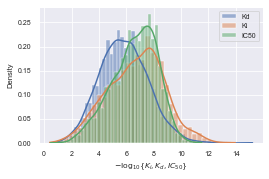

In [4]:
sns.set_context("paper", font_scale=.8, rc={"lines.linewidth": 1.5})

kde = True
norm_hist = True
figsize = (4.,2.5) 
color_palette = sns.color_palette(n_colors=3)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
# This for loop is messy (it could work just by using a single call and the `hue` argument) but in this case it is impossible to edit the legend to remove the
# legend name (metric)
for metric, color in zip(['Kd', 'Ki', 'IC50'], color_palette):
    sns.histplot(data=affinity_df[affinity_df['metric']==metric], x='-logKd/Ki', label=metric, kde=kde, stat="density", common_norm=False, color=color, ax=ax)
ax.legend()
ax.set_ylabel('Density')
ax.set_xlabel(r'$-\log_{10} \{K_i, K_d, IC_{50}\}$')
plt.show()